In [1]:
import pandas as pd

us_cap_data = pd.read_csv("repriskdata_2400_us_comp_returns.csv")
print(us_cap_data.head())

   reprisk_id        date  current_rri  rri_trend  peak_rri peak_rri_date  \
0      100077  2007-01-31          0.0        0.0       0.0           NaN   
1      100077  2007-02-28          0.0        0.0       0.0           NaN   
2      100077  2007-03-31          0.0        0.0       0.0           NaN   
3      100077  2007-04-30          0.0        0.0       0.0           NaN   
4      100077  2007-05-31          0.0        0.0       0.0           NaN   

  reprisk_rating  country_sector_average  environmental_percentage  \
0             AA                    22.0                       0.0   
1             AA                    22.0                       0.0   
2             AA                    22.0                       0.0   
3             AA                    22.0                       0.0   
4             AA                    22.0                       0.0   

   social_percentage  governance_percentage  primary_isin  \
0                0.0                    0.0  US75678V30

In [2]:
us_cap_data["year"] = pd.DatetimeIndex(us_cap_data['date']).year
us_cap_data["month"] = pd.DatetimeIndex(us_cap_data['date']).month
print(us_cap_data["year"].head())
print(us_cap_data["month"].head())
print(us_cap_data.shape)

us_cap_data["year"].dropna()
us_cap_data["month"].dropna()
print(us_cap_data.shape)

0    2007
1    2007
2    2007
3    2007
4    2007
Name: year, dtype: int64
0    1
1    2
2    3
3    4
4    5
Name: month, dtype: int64
(364217, 17)
(364217, 17)


In [3]:
us_cap_10to20 = us_cap_data[us_cap_data["year"] >= 2010]
us_cap_10to20 = us_cap_10to20[abs(us_cap_10to20["monthly_return"]) < 10] 
print(us_cap_10to20.head())

    reprisk_id        date  current_rri  rri_trend  peak_rri peak_rri_date  \
49      100077  2011-02-28          0.0        0.0       0.0           NaN   
50      100077  2011-03-31          0.0        0.0       0.0           NaN   
51      100077  2011-04-30          0.0        0.0       0.0           NaN   
53      100077  2011-06-30          0.0        0.0       0.0           NaN   
54      100077  2011-07-31          0.0        0.0       0.0           NaN   

   reprisk_rating  country_sector_average  environmental_percentage  \
49             AA                    24.0                       0.0   
50             AA                    24.0                       0.0   
51             AA                    24.0                       0.0   
53             AA                    24.0                       0.0   
54             AA                    24.0                       0.0   

    social_percentage  governance_percentage  primary_isin  \
49                0.0                    0

## EDA


In [4]:
us_cap_10to20 = us_cap_10to20.reset_index()
us_cap_10to20.monthly_return = us_cap_10to20.monthly_return.fillna(0.0)
returns_not_reported =[]
for i in range(len(us_cap_10to20.monthly_return)):
    if us_cap_10to20.monthly_return[i] == 'fail':
        returns_not_reported.append(i)
us_cap_10to20 = us_cap_10to20.drop(returns_not_reported)
us_cap_10to20.monthly_return = us_cap_10to20.monthly_return.astype(float)  

In [5]:
pd.options.display.max_rows = 100

In [6]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

count = us_cap_10to20.groupby(['reprisk_rating'])[['name']].count()
count.loc['total'] = np.sum(count, axis = 0)
count

,name
reprisk_rating,
A,38567
AA,107020
AAA,11267
B,4083
BB,6765
BBB,14484
C,118
CC,690
CCC,2555


In [7]:
for i in count.index:
    count.loc[i] = count.loc[i] / count.loc['total']
count_percent = round(count,3)
count_percent

,name
reprisk_rating,
A,0.208
AA,0.577
AAA,0.061
B,0.022
BB,0.036
BBB,0.078
C,0.001
CC,0.004
CCC,0.014


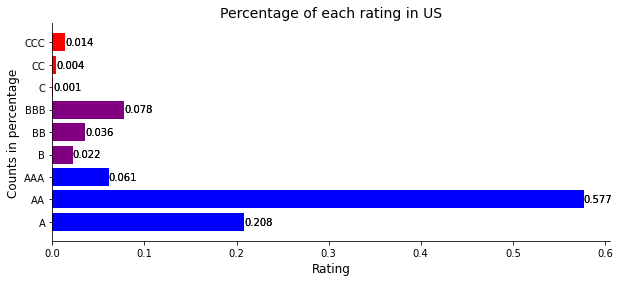

In [8]:
fig, ax = plt.subplots(figsize=(10,4)) 
New_Colors = ['blue','blue','blue','purple','purple','purple','red','red','red','orange']
bars =  ax.barh(count_percent.index[:-1], count_percent['name'][:-1], color=New_Colors)

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Counts in percentage', fontsize=12)
ax.set_title('Percentage of each rating in US', fontsize=14)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US count_percentage.png') 

plt.show()

In [9]:
rri = us_cap_10to20.groupby(['reprisk_rating'])[['current_rri']].mean()
rri

,current_rri
reprisk_rating,
A,16.321804
AA,3.023024
AAA,0.053430
B,31.405339
BB,25.377384
BBB,20.544670
C,44.203390
CC,50.088406
CCC,47.318591


In [10]:
us_cap_10to20[us_cap_10to20['year']==2018].groupby('reprisk_rating').count()

,index,reprisk_id,date,current_rri,rri_trend,peak_rri,peak_rri_date,country_sector_average,environmental_percentage,social_percentage,governance_percentage,primary_isin,name,ticker_US,monthly_return,year,month
reprisk_rating,,,,,,,,,,,,,,,,,
A,4002,4002,4002,4002,4002,4002,3987,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
AA,11990,11990,11990,11990,11990,11990,5834,11990,11990,11990,11990,11990,11990,11990,11990,11990,11990
AAA,51,51,51,51,51,51,25,51,51,51,51,51,51,51,51,51,51
B,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428
BB,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606,606
BBB,1424,1424,1424,1424,1424,1424,1418,1424,1424,1424,1424,1424,1424,1424,1424,1424,1424
C,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
CC,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
CCC,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254


In [11]:
us_countgraph = us_cap_10to20.groupby(['year','reprisk_rating'])['monthly_return'].count().unstack('reprisk_rating').fillna(0)
us_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC
year,,,,,,,,,
2010,1904.0,7791.0,2700.0,188.0,349.0,815.0,11.0,67.0,96.0
2011,2263.0,7117.0,3290.0,200.0,398.0,904.0,12.0,74.0,124.0
2012,2755.0,8202.0,1953.0,349.0,392.0,1081.0,0.0,88.0,182.0
2013,3342.0,10047.0,145.0,358.0,479.0,1026.0,9.0,118.0,212.0
2014,3634.0,10102.0,14.0,446.0,645.0,1323.0,34.0,90.0,258.0
2015,3790.0,9938.0,236.0,472.0,892.0,1633.0,22.0,81.0,283.0
2016,3934.0,9368.0,1419.0,379.0,850.0,1617.0,9.0,48.0,268.0
2017,3901.0,10315.0,1416.0,376.0,728.0,1455.0,12.0,15.0,220.0
2018,4002.0,11990.0,51.0,428.0,606.0,1424.0,9.0,13.0,254.0


In [12]:
import numpy as np

In [13]:
us_countgraph['total'] = np.sum(us_countgraph, axis = 0)
for i in range(len(us_countgraph)):
    us_countgraph['total'].iloc[i] = np.sum(us_countgraph.iloc[i])

In [14]:
us_countgraph['A_sum'] = us_countgraph['A']+ us_countgraph['AA']+ us_countgraph['AAA']
us_countgraph['B_sum'] = us_countgraph['B']+ us_countgraph['BB']+ us_countgraph['BBB']
us_countgraph['C_sum'] = us_countgraph['C']+ us_countgraph['CC']+ us_countgraph['CCC']

In [15]:
us_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,total,A_sum,B_sum,C_sum
year,,,,,,,,,,,,,
2010,1904.0,7791.0,2700.0,188.0,349.0,815.0,11.0,67.0,96.0,13921.0,12395.0,1352.0,174.0
2011,2263.0,7117.0,3290.0,200.0,398.0,904.0,12.0,74.0,124.0,14382.0,12670.0,1502.0,210.0
2012,2755.0,8202.0,1953.0,349.0,392.0,1081.0,0.0,88.0,182.0,15002.0,12910.0,1822.0,270.0
2013,3342.0,10047.0,145.0,358.0,479.0,1026.0,9.0,118.0,212.0,15736.0,13534.0,1863.0,339.0
2014,3634.0,10102.0,14.0,446.0,645.0,1323.0,34.0,90.0,258.0,16546.0,13750.0,2414.0,382.0
2015,3790.0,9938.0,236.0,472.0,892.0,1633.0,22.0,81.0,283.0,17347.0,13964.0,2997.0,386.0
2016,3934.0,9368.0,1419.0,379.0,850.0,1617.0,9.0,48.0,268.0,17892.0,14721.0,2846.0,325.0
2017,3901.0,10315.0,1416.0,376.0,728.0,1455.0,12.0,15.0,220.0,18438.0,15632.0,2559.0,247.0
2018,4002.0,11990.0,51.0,428.0,606.0,1424.0,9.0,13.0,254.0,18777.0,16043.0,2458.0,276.0


In [16]:
for i in us_countgraph.columns:
    us_countgraph[i] = us_countgraph[i] / us_countgraph['total']

In [17]:
us_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,total,A_sum,B_sum,C_sum
year,,,,,,,,,,,,,
2010,0.136772,0.559658,0.193952,0.013505,0.025070,0.058545,0.000790,0.004813,0.006896,1.0,12395.0,1352.0,174.0
2011,0.157349,0.494855,0.228758,0.013906,0.027673,0.062856,0.000834,0.005145,0.008622,1.0,12670.0,1502.0,210.0
2012,0.183642,0.546727,0.130183,0.023264,0.026130,0.072057,0.000000,0.005866,0.012132,1.0,12910.0,1822.0,270.0
2013,0.212379,0.638472,0.009215,0.022750,0.030440,0.065201,0.000572,0.007499,0.013472,1.0,13534.0,1863.0,339.0
2014,0.219630,0.610540,0.000846,0.026955,0.038982,0.079959,0.002055,0.005439,0.015593,1.0,13750.0,2414.0,382.0
2015,0.218482,0.572894,0.013605,0.027209,0.051421,0.094137,0.001268,0.004669,0.016314,1.0,13964.0,2997.0,386.0
2016,0.219875,0.523586,0.079309,0.021183,0.047507,0.090376,0.000503,0.002683,0.014979,1.0,14721.0,2846.0,325.0
2017,0.211574,0.559442,0.076798,0.020393,0.039484,0.078913,0.000651,0.000814,0.011932,1.0,15632.0,2559.0,247.0
2018,0.213133,0.638547,0.002716,0.022794,0.032274,0.075837,0.000479,0.000692,0.013527,1.0,16043.0,2458.0,276.0


In [18]:
us_countgraph['A_sum'] = us_countgraph['A']+ us_countgraph['AA']+ us_countgraph['AAA']
us_countgraph['B_sum'] = us_countgraph['B']+ us_countgraph['BB']+ us_countgraph['BBB']
us_countgraph['C_sum'] = us_countgraph['C']+ us_countgraph['CC']+ us_countgraph['CCC']

In [19]:
us_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,total,A_sum,B_sum,C_sum
year,,,,,,,,,,,,,
2010,0.136772,0.559658,0.193952,0.013505,0.025070,0.058545,0.000790,0.004813,0.006896,1.0,0.890381,0.097119,0.012499
2011,0.157349,0.494855,0.228758,0.013906,0.027673,0.062856,0.000834,0.005145,0.008622,1.0,0.880962,0.104436,0.014602
2012,0.183642,0.546727,0.130183,0.023264,0.026130,0.072057,0.000000,0.005866,0.012132,1.0,0.860552,0.121450,0.017998
2013,0.212379,0.638472,0.009215,0.022750,0.030440,0.065201,0.000572,0.007499,0.013472,1.0,0.860066,0.118391,0.021543
2014,0.219630,0.610540,0.000846,0.026955,0.038982,0.079959,0.002055,0.005439,0.015593,1.0,0.831017,0.145896,0.023087
2015,0.218482,0.572894,0.013605,0.027209,0.051421,0.094137,0.001268,0.004669,0.016314,1.0,0.804981,0.172768,0.022252
2016,0.219875,0.523586,0.079309,0.021183,0.047507,0.090376,0.000503,0.002683,0.014979,1.0,0.822770,0.159066,0.018165
2017,0.211574,0.559442,0.076798,0.020393,0.039484,0.078913,0.000651,0.000814,0.011932,1.0,0.847814,0.138789,0.013396
2018,0.213133,0.638547,0.002716,0.022794,0.032274,0.075837,0.000479,0.000692,0.013527,1.0,0.854396,0.130905,0.014699


In [20]:
us_countgraph_percentage = round(us_countgraph,2)
us_countgraph_percentage

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,total,A_sum,B_sum,C_sum
year,,,,,,,,,,,,,
2010,0.14,0.56,0.19,0.01,0.03,0.06,0.0,0.00,0.01,1.0,0.89,0.10,0.01
2011,0.16,0.49,0.23,0.01,0.03,0.06,0.0,0.01,0.01,1.0,0.88,0.10,0.01
2012,0.18,0.55,0.13,0.02,0.03,0.07,0.0,0.01,0.01,1.0,0.86,0.12,0.02
2013,0.21,0.64,0.01,0.02,0.03,0.07,0.0,0.01,0.01,1.0,0.86,0.12,0.02
2014,0.22,0.61,0.00,0.03,0.04,0.08,0.0,0.01,0.02,1.0,0.83,0.15,0.02
2015,0.22,0.57,0.01,0.03,0.05,0.09,0.0,0.00,0.02,1.0,0.80,0.17,0.02
2016,0.22,0.52,0.08,0.02,0.05,0.09,0.0,0.00,0.01,1.0,0.82,0.16,0.02
2017,0.21,0.56,0.08,0.02,0.04,0.08,0.0,0.00,0.01,1.0,0.85,0.14,0.01
2018,0.21,0.64,0.00,0.02,0.03,0.08,0.0,0.00,0.01,1.0,0.85,0.13,0.01


In [21]:
import matplotlib.pyplot as plt

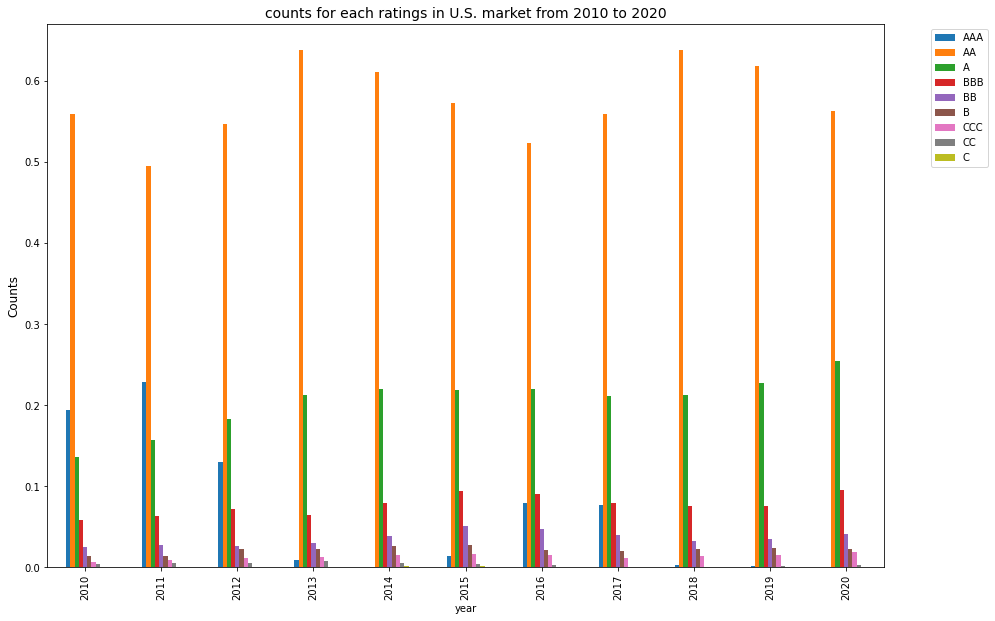

In [22]:
plt.rcParams["figure.figsize"] = (15, 10)
us_countgraph[['AAA','AA','A','BBB','BB','B','CCC','CC','C']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left')
plt.ylabel('Year',size = 12)
plt.ylabel('Counts',size = 12)
plt.title('counts for each ratings in U.S. market from 2010 to 2020', size = 14)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US rating count.png') 


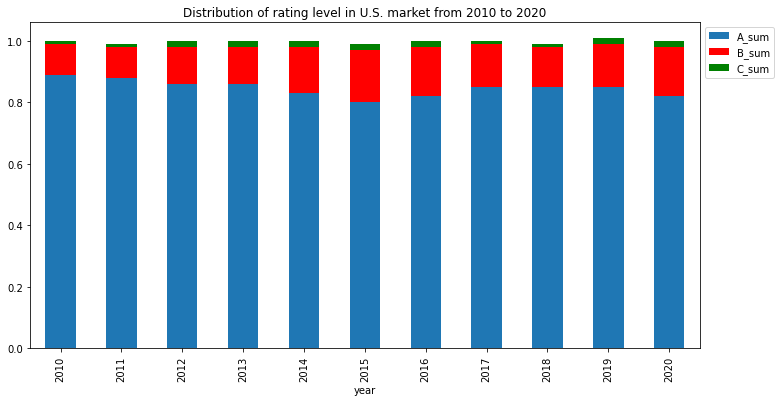

In [23]:
plt.figure(figsize=(12,6))
us_countgraph_percentage['A_sum'].plot(kind='bar')
us_countgraph_percentage['B_sum'].plot(kind='bar', bottom = us_countgraph_percentage['A_sum'], color = 'r')
us_countgraph_percentage['C_sum'].plot(kind='bar', bottom = us_countgraph_percentage['A_sum']+us_countgraph_percentage['B_sum'], color = 'g')
plt.legend(bbox_to_anchor=(1, 1) ,loc='upper left')
plt.title('Distribution of rating level in U.S. market from 2010 to 2020')
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US rating distribution.png') 

plt.show()

In [24]:
import pandas as pd             
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

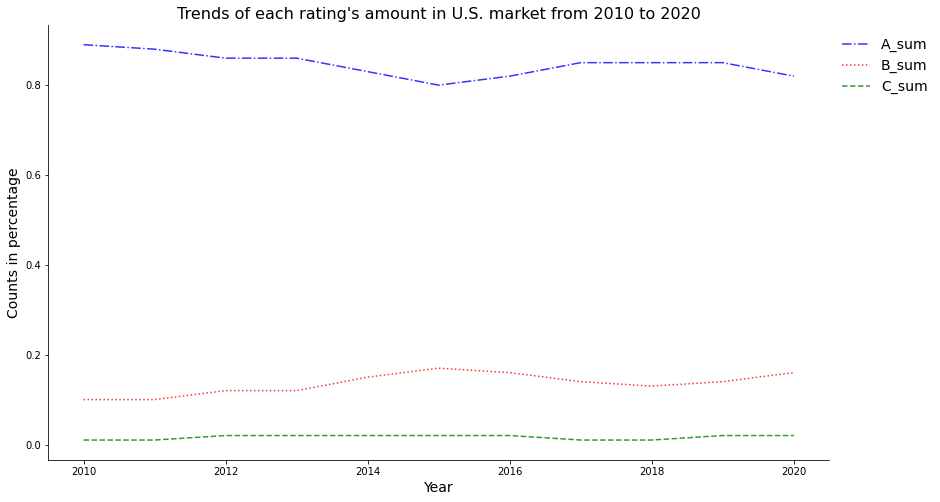

In [25]:
fig, ax = plt.subplots(figsize=(14,8)) 
ax.plot(us_countgraph_percentage.index, us_countgraph_percentage['A_sum'],
        color='blue', alpha = 0.8, linestyle = '-.', label = 'A_sum')  
ax.plot(us_countgraph_percentage.index, us_countgraph_percentage['B_sum'],
        color='red', alpha = 0.8, linestyle = ':', label = 'B_sum')
ax.plot(us_countgraph_percentage.index, us_countgraph_percentage['C_sum'],
        color='green', alpha = 0.8, linestyle = '--', label = 'C_sum')

ax.set_xlabel('Year', fontsize = 14) 
ax.set_ylabel('Counts in percentage', fontsize = 14)  

ax.set_title("Trends of each rating's amount in U.S. market from 2010 to 2020", fontsize = 16)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False, fontsize=14,bbox_to_anchor=(1, 1) ,loc='upper left')
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US rating trend.png') 

plt.show()

In [26]:
import pandas as pd

cap_data = pd.read_csv("1480_EU_companies.csv")
cap_data["year"] = pd.DatetimeIndex(cap_data['date']).year
cap_data["month"] = pd.DatetimeIndex(cap_data['date']).month
cap_data["year"].dropna()
cap_data["month"].dropna()
eu_cap_10to20 = cap_data[cap_data["year"] >= 2010]
eu_cap_10to20 = eu_cap_10to20[abs(eu_cap_10to20["monthly_return"]) < 10] 

In [27]:
eu_cap_10to20 = eu_cap_10to20.reset_index()
eu_cap_10to20.monthly_return = eu_cap_10to20.monthly_return.fillna(0.0)
returns_not_reported =[]
for i in range(len(eu_cap_10to20.monthly_return)):
    if eu_cap_10to20.monthly_return[i] == 'fail':
        returns_not_reported.append(i)
eu_cap_10to20 = eu_cap_10to20.drop(returns_not_reported)
eu_cap_10to20.monthly_return = eu_cap_10to20.monthly_return.astype(float)  

In [28]:
pd.options.display.max_rows = 100

In [29]:
eu_countgraph = eu_cap_10to20.groupby(['year','reprisk_rating'])['monthly_return'].count().unstack('reprisk_rating').fillna(0)
eu_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D
year,,,,,,,,,,
2010,1600.0,2081.0,1108.0,133.0,233.0,464.0,9.0,86.0,79.0,0.0
2011,1401.0,1501.0,1993.0,191.0,275.0,521.0,0.0,56.0,49.0,1.0
2012,1583.0,1823.0,1437.0,177.0,305.0,671.0,0.0,62.0,57.0,0.0
2013,1705.0,1868.0,1189.0,192.0,260.0,827.0,3.0,49.0,98.0,0.0
2014,1410.0,1903.0,1051.0,285.0,357.0,1251.0,22.0,44.0,181.0,0.0
2015,1510.0,1813.0,1097.0,331.0,462.0,1327.0,25.0,62.0,199.0,0.0
2016,1703.0,2081.0,1089.0,264.0,629.0,1117.0,10.0,65.0,179.0,0.0
2017,1579.0,2139.0,1026.0,294.0,767.0,1214.0,11.0,63.0,203.0,0.0
2018,1816.0,1965.0,962.0,484.0,888.0,834.0,14.0,92.0,280.0,7.0


In [30]:
import numpy as np
eu_countgraph['total'] = np.sum(eu_countgraph, axis = 0)
for i in range(len(eu_countgraph)):
    eu_countgraph['total'].iloc[i] = np.sum(eu_countgraph.iloc[i])
eu_countgraph['A_sum'] = eu_countgraph['A']+ eu_countgraph['AA']+ eu_countgraph['AAA']
eu_countgraph['B_sum'] = eu_countgraph['B']+ eu_countgraph['BB']+ eu_countgraph['BBB']
eu_countgraph['C_sum'] = eu_countgraph['C']+ eu_countgraph['CC']+ eu_countgraph['CCC']
eu_countgraph['D_sum'] = eu_countgraph['D']
eu_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,1600.0,2081.0,1108.0,133.0,233.0,464.0,9.0,86.0,79.0,0.0,5793.0,4789.0,830.0,174.0,0.0
2011,1401.0,1501.0,1993.0,191.0,275.0,521.0,0.0,56.0,49.0,1.0,5988.0,4895.0,987.0,105.0,1.0
2012,1583.0,1823.0,1437.0,177.0,305.0,671.0,0.0,62.0,57.0,0.0,6115.0,4843.0,1153.0,119.0,0.0
2013,1705.0,1868.0,1189.0,192.0,260.0,827.0,3.0,49.0,98.0,0.0,6191.0,4762.0,1279.0,150.0,0.0
2014,1410.0,1903.0,1051.0,285.0,357.0,1251.0,22.0,44.0,181.0,0.0,6504.0,4364.0,1893.0,247.0,0.0
2015,1510.0,1813.0,1097.0,331.0,462.0,1327.0,25.0,62.0,199.0,0.0,6826.0,4420.0,2120.0,286.0,0.0
2016,1703.0,2081.0,1089.0,264.0,629.0,1117.0,10.0,65.0,179.0,0.0,7137.0,4873.0,2010.0,254.0,0.0
2017,1579.0,2139.0,1026.0,294.0,767.0,1214.0,11.0,63.0,203.0,0.0,7296.0,4744.0,2275.0,277.0,0.0
2018,1816.0,1965.0,962.0,484.0,888.0,834.0,14.0,92.0,280.0,7.0,7342.0,4743.0,2206.0,386.0,7.0


In [31]:
for i in eu_countgraph.columns:
    eu_countgraph[i] = eu_countgraph[i] / eu_countgraph['total']
eu_countgraph    

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,0.276195,0.359227,0.191265,0.022959,0.040221,0.080097,0.001554,0.014846,0.013637,0.000000,1.0,4789.0,830.0,174.0,0.0
2011,0.233968,0.250668,0.332832,0.031897,0.045925,0.087007,0.000000,0.009352,0.008183,0.000167,1.0,4895.0,987.0,105.0,1.0
2012,0.258872,0.298119,0.234996,0.028945,0.049877,0.109730,0.000000,0.010139,0.009321,0.000000,1.0,4843.0,1153.0,119.0,0.0
2013,0.275400,0.301728,0.192053,0.031013,0.041996,0.133581,0.000485,0.007915,0.015829,0.000000,1.0,4762.0,1279.0,150.0,0.0
2014,0.216790,0.292589,0.161593,0.043819,0.054889,0.192343,0.003383,0.006765,0.027829,0.000000,1.0,4364.0,1893.0,247.0,0.0
2015,0.221213,0.265602,0.160709,0.048491,0.067682,0.194404,0.003662,0.009083,0.029153,0.000000,1.0,4420.0,2120.0,286.0,0.0
2016,0.238616,0.291579,0.152585,0.036990,0.088132,0.156508,0.001401,0.009107,0.025081,0.000000,1.0,4873.0,2010.0,254.0,0.0
2017,0.216420,0.293174,0.140625,0.040296,0.105126,0.166393,0.001508,0.008635,0.027823,0.000000,1.0,4744.0,2275.0,277.0,0.0
2018,0.247344,0.267638,0.131027,0.065922,0.120948,0.113593,0.001907,0.012531,0.038137,0.000953,1.0,4743.0,2206.0,386.0,7.0


In [32]:
eu_countgraph['A_sum'] = eu_countgraph['A']+ eu_countgraph['AA']+ eu_countgraph['AAA']
eu_countgraph['B_sum'] = eu_countgraph['B']+ eu_countgraph['BB']+ eu_countgraph['BBB']
eu_countgraph['C_sum'] = eu_countgraph['C']+ eu_countgraph['CC']+ eu_countgraph['CCC']
eu_countgraph['D_sum'] = eu_countgraph['D']
eu_countgraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,0.276195,0.359227,0.191265,0.022959,0.040221,0.080097,0.001554,0.014846,0.013637,0.000000,1.0,0.826687,0.143276,0.030036,0.000000
2011,0.233968,0.250668,0.332832,0.031897,0.045925,0.087007,0.000000,0.009352,0.008183,0.000167,1.0,0.817468,0.164830,0.017535,0.000167
2012,0.258872,0.298119,0.234996,0.028945,0.049877,0.109730,0.000000,0.010139,0.009321,0.000000,1.0,0.791987,0.188553,0.019460,0.000000
2013,0.275400,0.301728,0.192053,0.031013,0.041996,0.133581,0.000485,0.007915,0.015829,0.000000,1.0,0.769181,0.206590,0.024229,0.000000
2014,0.216790,0.292589,0.161593,0.043819,0.054889,0.192343,0.003383,0.006765,0.027829,0.000000,1.0,0.670972,0.291052,0.037977,0.000000
2015,0.221213,0.265602,0.160709,0.048491,0.067682,0.194404,0.003662,0.009083,0.029153,0.000000,1.0,0.647524,0.310577,0.041899,0.000000
2016,0.238616,0.291579,0.152585,0.036990,0.088132,0.156508,0.001401,0.009107,0.025081,0.000000,1.0,0.682780,0.281631,0.035589,0.000000
2017,0.216420,0.293174,0.140625,0.040296,0.105126,0.166393,0.001508,0.008635,0.027823,0.000000,1.0,0.650219,0.311815,0.037966,0.000000
2018,0.247344,0.267638,0.131027,0.065922,0.120948,0.113593,0.001907,0.012531,0.038137,0.000953,1.0,0.646009,0.300463,0.052574,0.000953


In [33]:
eu_countgraph_percentage = round(eu_countgraph,2)
eu_countgraph_percentage

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,total,A_sum,B_sum,C_sum,D_sum
year,,,,,,,,,,,,,,,
2010,0.28,0.36,0.19,0.02,0.04,0.08,0.0,0.01,0.01,0.0,1.0,0.83,0.14,0.03,0.0
2011,0.23,0.25,0.33,0.03,0.05,0.09,0.0,0.01,0.01,0.0,1.0,0.82,0.16,0.02,0.0
2012,0.26,0.30,0.23,0.03,0.05,0.11,0.0,0.01,0.01,0.0,1.0,0.79,0.19,0.02,0.0
2013,0.28,0.30,0.19,0.03,0.04,0.13,0.0,0.01,0.02,0.0,1.0,0.77,0.21,0.02,0.0
2014,0.22,0.29,0.16,0.04,0.05,0.19,0.0,0.01,0.03,0.0,1.0,0.67,0.29,0.04,0.0
2015,0.22,0.27,0.16,0.05,0.07,0.19,0.0,0.01,0.03,0.0,1.0,0.65,0.31,0.04,0.0
2016,0.24,0.29,0.15,0.04,0.09,0.16,0.0,0.01,0.03,0.0,1.0,0.68,0.28,0.04,0.0
2017,0.22,0.29,0.14,0.04,0.11,0.17,0.0,0.01,0.03,0.0,1.0,0.65,0.31,0.04,0.0
2018,0.25,0.27,0.13,0.07,0.12,0.11,0.0,0.01,0.04,0.0,1.0,0.65,0.30,0.05,0.0


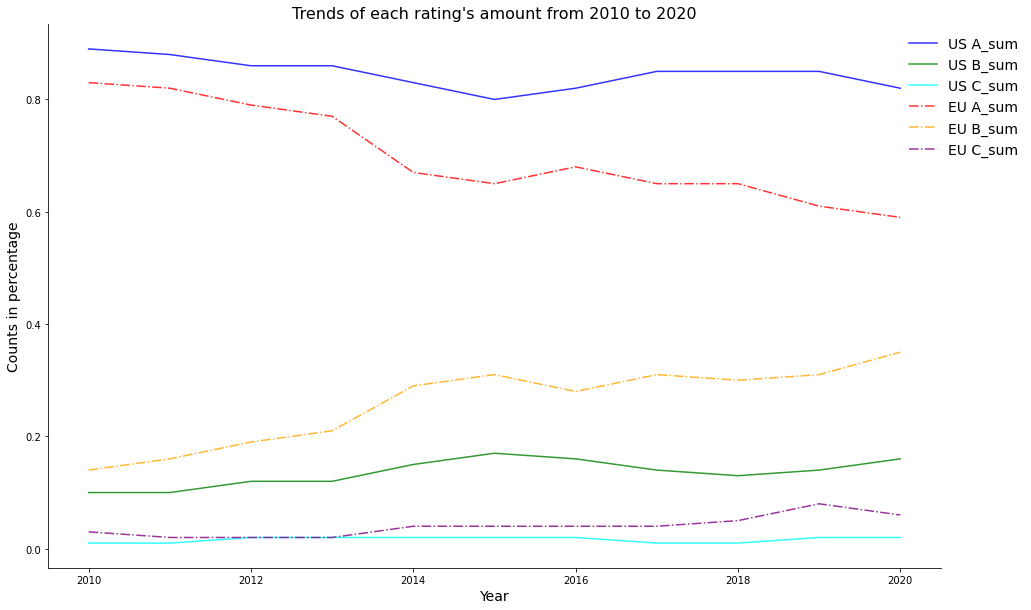

In [34]:
fig, ax = plt.subplots(figsize=(16,10)) 
ax.plot(us_countgraph_percentage.index, us_countgraph_percentage['A_sum'],
        color='blue', alpha = 0.8, linestyle = '-', label = 'A_sum')  
ax.plot(us_countgraph_percentage.index, us_countgraph_percentage['B_sum'],
        color='green', alpha = 0.8, linestyle = '-', label = 'B_sum')
ax.plot(us_countgraph_percentage.index, us_countgraph_percentage['C_sum'],
        color='Cyan', alpha = 0.8, linestyle = '-', label = 'C_sum')

ax.plot(eu_countgraph_percentage.index, eu_countgraph_percentage['A_sum'],
        color='red', alpha = 0.8, linestyle = '-.', label = 'A_sum')  
ax.plot(eu_countgraph_percentage.index, eu_countgraph_percentage['B_sum'],
        color='orange', alpha = 0.8, linestyle = '-.', label = 'B_sum')
ax.plot(eu_countgraph_percentage.index, eu_countgraph_percentage['C_sum'],
        color='purple', alpha = 0.8, linestyle = '-.', label = 'C_sum')

ax.set_xlabel('Year', fontsize = 14) 
ax.set_ylabel('Counts in percentage', fontsize = 14)  

ax.set_title("Trends of each rating's amount from 2010 to 2020", fontsize = 16)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

l = ax.legend(frameon=False, fontsize=14,bbox_to_anchor=(0.95, 1) ,loc='upper left')

l.get_texts()[0].set_text('US A_sum')
l.get_texts()[1].set_text('US B_sum')
l.get_texts()[2].set_text('US C_sum')
l.get_texts()[3].set_text('EU A_sum')
l.get_texts()[4].set_text('EU B_sum')
l.get_texts()[5].set_text('EU C_sum')

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US rating trend.png') 

plt.show()

In [35]:
rri = us_cap_10to20.groupby(['year','reprisk_rating'])['current_rri'].mean().unstack('reprisk_rating')
rri

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC
year,,,,,,,,,
2010,15.281513,1.304454,0.022963,29.611702,23.028653,20.150920,40.727273,46.388060,36.510417
2011,17.671675,2.044822,0.000304,31.850000,24.349246,20.088496,26.166667,60.189189,38.927419
2012,18.105263,2.594611,0.000000,25.810888,25.721939,20.418131,NaN,57.181818,47.434066
2013,16.234889,2.203444,0.000000,27.645251,24.250522,20.820663,57.222222,49.610169,43.462264
2014,17.260870,2.282617,0.000000,31.349776,27.001550,23.428571,44.588235,54.666667,48.647287
2015,16.805013,2.795230,0.000000,28.588983,25.227578,21.204532,50.272727,45.370370,47.088339
2016,16.043467,4.339453,0.120507,29.023747,23.591765,19.873222,56.777778,42.625000,45.895522
2017,15.479621,4.408337,0.131356,35.204787,26.671703,20.069416,42.500000,42.733333,52.500000
2018,16.275612,3.243786,0.901961,34.747664,25.711221,20.047051,32.888889,52.461538,50.850394


In [36]:
rri["A's"] = (rri['A'] + rri['AA'] + rri['AAA'])/3
rri["B's"] = (rri['B'] + rri['BB'] + rri['BBB'])/3
rri["C's"] = (rri['C'].fillna(np.mean(rri['C'])) + rri['CC'] + rri['CCC'])/3
rri

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,A's,B's,C's
year,,,,,,,,,,,,
2010,15.281513,1.304454,0.022963,29.611702,23.028653,20.150920,40.727273,46.388060,36.510417,5.536310,24.263759,41.208583
2011,17.671675,2.044822,0.000304,31.850000,24.349246,20.088496,26.166667,60.189189,38.927419,6.572267,25.429247,41.761092
2012,18.105263,2.594611,0.000000,25.810888,25.721939,20.418131,NaN,57.181818,47.434066,6.899958,23.983653,49.502953
2013,16.234889,2.203444,0.000000,27.645251,24.250522,20.820663,57.222222,49.610169,43.462264,6.146111,24.238812,50.098219
2014,17.260870,2.282617,0.000000,31.349776,27.001550,23.428571,44.588235,54.666667,48.647287,6.514496,27.259966,49.300730
2015,16.805013,2.795230,0.000000,28.588983,25.227578,21.204532,50.272727,45.370370,47.088339,6.533415,25.007031,47.577146
2016,16.043467,4.339453,0.120507,29.023747,23.591765,19.873222,56.777778,42.625000,45.895522,6.834476,24.162911,48.432767
2017,15.479621,4.408337,0.131356,35.204787,26.671703,20.069416,42.500000,42.733333,52.500000,6.673105,27.315302,45.911111
2018,16.275612,3.243786,0.901961,34.747664,25.711221,20.047051,32.888889,52.461538,50.850394,6.807120,26.835312,45.400274


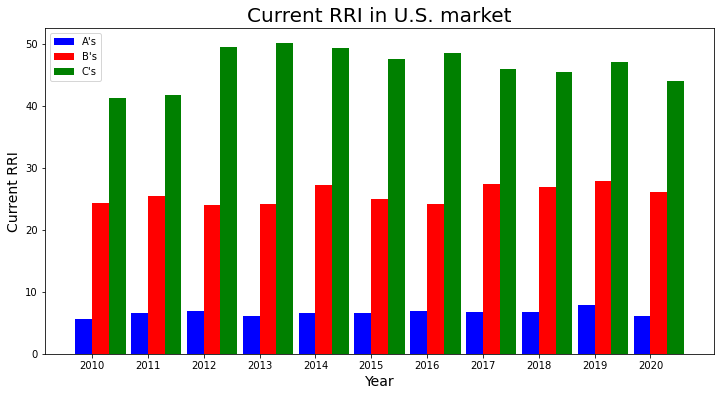

In [37]:
fig, ax = plt.subplots(figsize=(12,6)) 
X = rri.index
X_axis = np.arange(len(rri.index))

plt.bar(X_axis - 0.15, rri["A's"], 0.3, color='blue')
plt.bar(X_axis + 0.15, rri["B's"], 0.3, color='red')
plt.bar(X_axis + 0.45, rri["C's"], 0.3, color='green')

plt.xticks(X_axis, X)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Current RRI', fontsize=14)

plt.legend(("A's","B's","C's"),loc='upper left')


plt.title('Current RRI in U.S. market', fontsize=20)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US c_rri.png') 

plt.show()


In [38]:
rri = us_cap_10to20.groupby(['reprisk_rating'])[['current_rri']].mean()
rri = round(rri,2)
rri

,current_rri
reprisk_rating,
A,16.32
AA,3.02
AAA,0.05
B,31.41
BB,25.38
BBB,20.54
C,44.20
CC,50.09
CCC,47.32


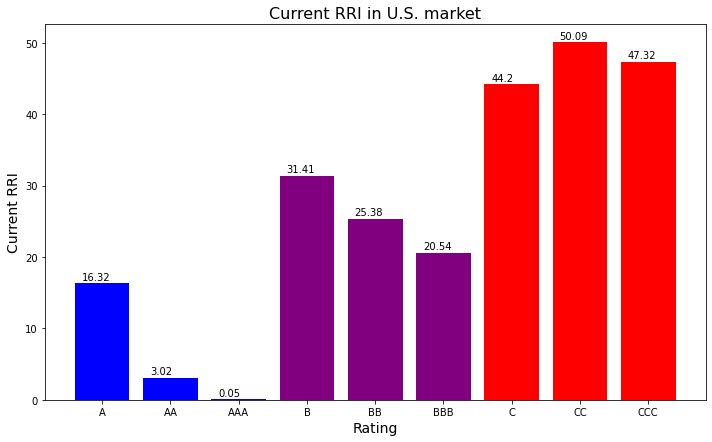

In [39]:
fig, ax = plt.subplots(figsize=(10,6)) 
New_Colors = ['blue','blue','blue','purple','purple','purple','red','red','red','orange']

plt.bar(rri.index, rri["current_rri"],color = New_Colors)


plt.xlabel('Rating', fontsize=14)
plt.ylabel('Current RRI', fontsize=14)

for index,data in enumerate(rri["current_rri"]):
    plt.text(x=index-0.3 , y =data+0.5 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()

plt.title('Current RRI in U.S. market', fontsize=16)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US c_rri.png') 

plt.show()

In [40]:
rri.loc["A's"] = (rri.loc['A'] + rri.loc['AA'] + rri.loc['AAA'])/3
rri.loc["B's"] = (rri.loc['B'] + rri.loc['BB'] + rri.loc['BBB'])/3
rri.loc["C's"] = (rri.loc['C'] + rri.loc['CC'] + rri.loc['CCC'])/3
rri = round(rri,2)
rri

,current_rri
reprisk_rating,
A,16.32
AA,3.02
AAA,0.05
B,31.41
BB,25.38
BBB,20.54
C,44.20
CC,50.09
CCC,47.32


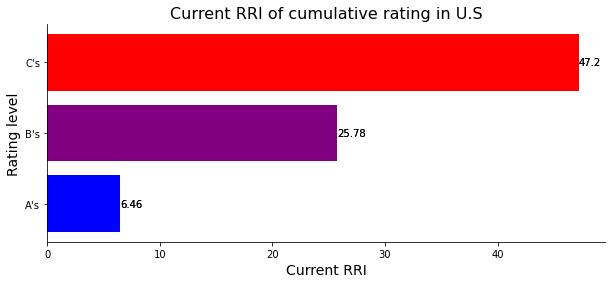

In [41]:
fig, ax = plt.subplots(figsize=(10,4)) 
New_Colors = ['blue','purple','red']
bars = ax.barh(rri.index[-3:], rri.loc[["A's","B's","C's"]]['current_rri'], color=New_Colors)

ax.bar_label(bars)

for bars in ax.containers:
    ax.bar_label(bars,)
ax.set_xlabel('Current RRI', fontsize=14)
ax.set_ylabel('Rating level', fontsize=14)
ax.set_title('Current RRI of cumulative rating in U.S', fontsize=16)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US cumulative c_rri.png') 

plt.show()


In [42]:
meangraph = eu_cap_10to20.groupby(['year','reprisk_rating'])['monthly_return'].mean().unstack('reprisk_rating')
meangraph 

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D
year,,,,,,,,,,
2010,0.011456,0.012577,0.017056,-0.028218,0.013315,0.004423,-0.018155,-0.003661,0.012269,NaN
2011,-0.018996,-0.009488,-0.008972,-0.022592,-0.022695,-0.013207,NaN,-0.008385,-0.001894,-0.033333
2012,0.014209,0.020648,0.011511,0.034277,0.000575,0.009078,NaN,0.008597,0.013423,NaN
2013,0.025922,0.024833,0.029577,0.034928,0.025065,0.033814,0.002122,0.008205,0.027159,NaN
2014,0.005300,0.008284,0.002701,-0.001415,-0.002231,-0.000985,-0.003330,0.007877,-0.000806,NaN
2015,0.014088,0.016813,0.016225,0.016953,0.006805,0.010101,0.009189,0.006800,0.000799,NaN
2016,0.007514,0.014262,0.014704,0.000827,0.012371,0.004816,-0.001763,0.007137,0.002381,NaN
2017,0.015760,0.014865,0.012891,0.015525,0.013497,0.024983,0.003438,0.010550,0.015450,NaN
2018,-0.009163,-0.011460,-0.005029,-0.011052,-0.011901,-0.017788,-0.000675,-0.035491,-0.005361,-0.022596


In [43]:
meangraph["A's"] = (meangraph['A'] + meangraph['AA'] + meangraph['AAA'])/3
meangraph["B's"] = (meangraph['B'] + meangraph['BB'] + meangraph['BBB'])/3
meangraph["C's"] = (meangraph['C'].fillna(np.mean(meangraph['C'])) + meangraph['CC'] + meangraph['CCC'])/3
meangraph

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,A's,B's,C's
year,,,,,,,,,,,,,
2010,0.011456,0.012577,0.017056,-0.028218,0.013315,0.004423,-0.018155,-0.003661,0.012269,NaN,0.013696,-0.003493,-0.003182
2011,-0.018996,-0.009488,-0.008972,-0.022592,-0.022695,-0.013207,NaN,-0.008385,-0.001894,-0.033333,-0.012485,-0.019498,-0.002680
2012,0.014209,0.020648,0.011511,0.034277,0.000575,0.009078,NaN,0.008597,0.013423,NaN,0.015456,0.014643,0.008086
2013,0.025922,0.024833,0.029577,0.034928,0.025065,0.033814,0.002122,0.008205,0.027159,NaN,0.026777,0.031269,0.012495
2014,0.005300,0.008284,0.002701,-0.001415,-0.002231,-0.000985,-0.003330,0.007877,-0.000806,NaN,0.005429,-0.001544,0.001247
2015,0.014088,0.016813,0.016225,0.016953,0.006805,0.010101,0.009189,0.006800,0.000799,NaN,0.015709,0.011287,0.005596
2016,0.007514,0.014262,0.014704,0.000827,0.012371,0.004816,-0.001763,0.007137,0.002381,NaN,0.012160,0.006005,0.002585
2017,0.015760,0.014865,0.012891,0.015525,0.013497,0.024983,0.003438,0.010550,0.015450,NaN,0.014505,0.018001,0.009813
2018,-0.009163,-0.011460,-0.005029,-0.011052,-0.011901,-0.017788,-0.000675,-0.035491,-0.005361,-0.022596,-0.008551,-0.013580,-0.013842


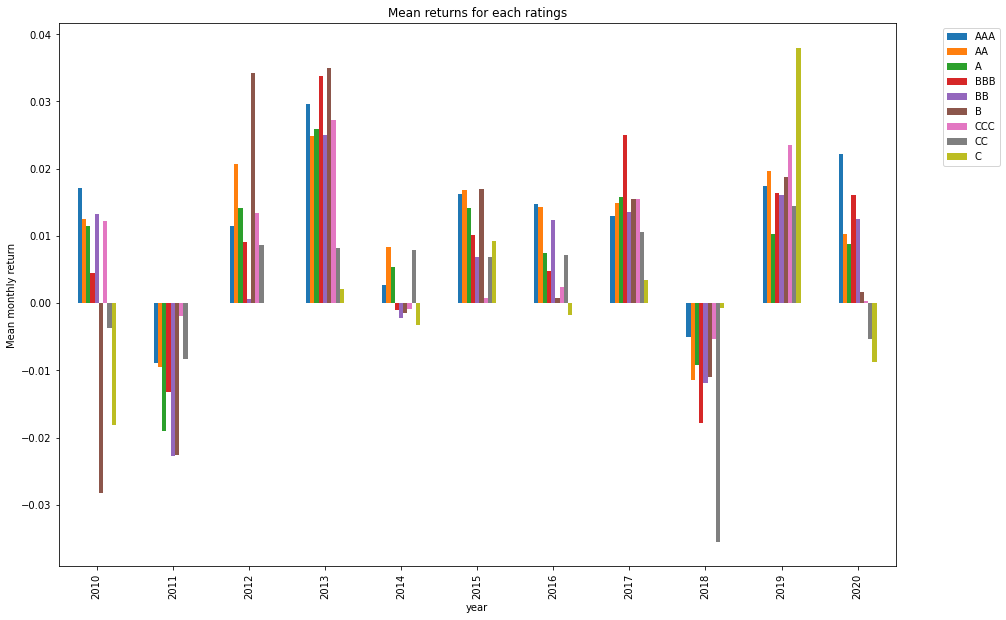

In [44]:
plt.rcParams["figure.figsize"] = (15, 10)
meangraph[['AAA','AA','A','BBB','BB','B','CCC','CC','C']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Mean monthly return')
plt.title('Mean returns for each ratings')
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US mean return.png') 


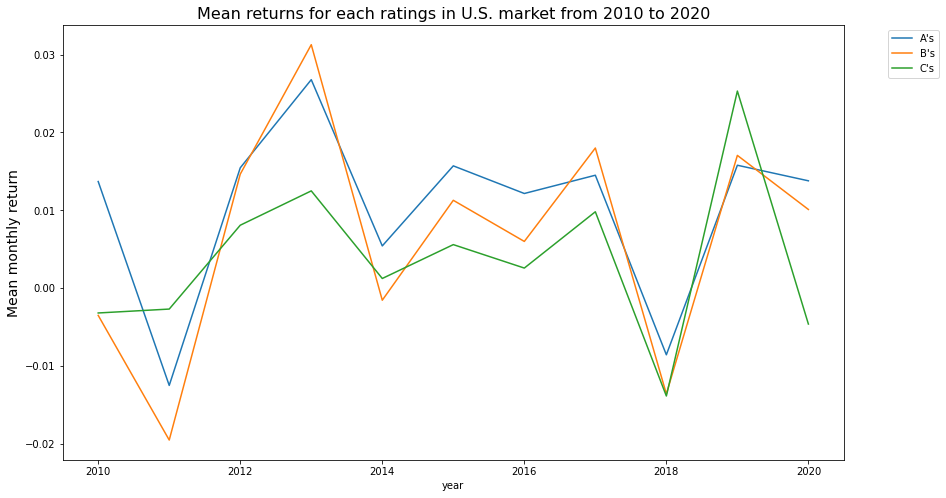

In [45]:
plt.rcParams["figure.figsize"] = (14, 8)
meangraph[["A's", "B's","C's"]].plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Mean monthly return',size =14)
plt.title('Mean returns for each ratings in U.S. market from 2010 to 2020', size = 16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US mean returns.png') 


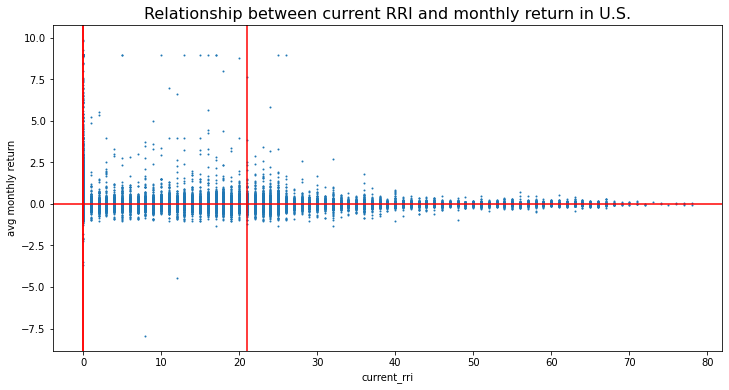

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.scatter('current_rri', 'monthly_return',data=us_cap_10to20, s=1)
plt.xlabel('current_rri')
plt.ylabel('avg monthly return')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = us_cap_10to20['current_rri'].quantile(.2), color = 'r', linestyle = '-')
plt.axvline(x = us_cap_10to20['current_rri'].quantile(.5), color = 'r', linestyle = '-')
plt.axvline(x = us_cap_10to20['current_rri'].quantile(.8), color = 'r', linestyle = '-')
plt.title('Relationship between current RRI and monthly return in U.S.', fontsize=16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US current RRI & monthly return.png') 

plt.show()


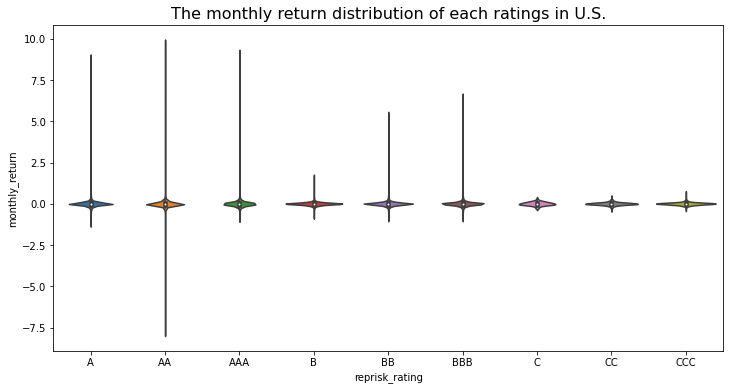

In [47]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.violinplot(x='reprisk_rating', y='monthly_return', data=us_cap_10to20.sort_values('reprisk_rating'))
plt.title('The monthly return distribution of each ratings in U.S.', fontsize=16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US return distribution.png') 


In [48]:
us_cap_10to20.groupby('year')['monthly_return','reprisk_rating'].count()

<ipython-input-48-32fd4891d88e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  us_cap_10to20.groupby('year')['monthly_return','reprisk_rating'].count()


,monthly_return,reprisk_rating
year,,
2010,13921,13921
2011,14382,14382
2012,15002,15002
2013,15736,15736
2014,16546,16546
2015,17347,17347
2016,17892,17892
2017,18438,18438
2018,18777,18777


In [49]:
import numpy as np
compare = np.mean(us_cap_10to20.loc[( (us_cap_10to20['year'] == 2020) | (us_cap_10to20['year'] == 2019)) & 
((us_cap_10to20['reprisk_rating'] == 'CCC') & (us_cap_10to20['monthly_return'] > 0)),:]['monthly_return'])


us_cap_10to20.loc[( (us_cap_10to20['year'] == 2020) | (us_cap_10to20['year'] == 2019)) & 
(((us_cap_10to20['reprisk_rating'] == 'CCC')|(us_cap_10to20['reprisk_rating'] == 'CC')) & (us_cap_10to20['monthly_return'] > compare)),:].groupby(['name','reprisk_rating','year']).agg({'monthly_return':'mean'}).sort_values('monthly_return', ascending = False)

,,,monthly_return
name,reprisk_rating,year,
Tesla Inc (formerly Tesla Motors),CCC,2020,0.444705
DuPont de Nemours Inc (DuPont; DowDuPont),CCC,2020,0.378886
Zoom Video Communications Inc (Zoom),CC,2020,0.366717
Sculptor Capital Management Inc (formerly Och-Ziff Capital Management Group Inc),CC,2019,0.347166
PG&E Corp (PGE),CCC,2020,0.328452
General Electric Co (GE),CCC,2020,0.281489
Tesla Inc (formerly Tesla Motors),CCC,2019,0.260724
Uber Technologies Inc (Uber),CCC,2020,0.254465
Ralph Lauren Corp,CCC,2020,0.246259


In [50]:
# Few outliers that drove the avg monthly return for 'CC' ratings companies in 2017,2019
# Equifax Facebook  2019
# Equifax high monthly return on June 2019 (0.118610), had a huge increase in the risk index on July
# Tesla 2017
# Facebook and Tesla had extremely high returns despite low rating

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between current RRI and monthly return')

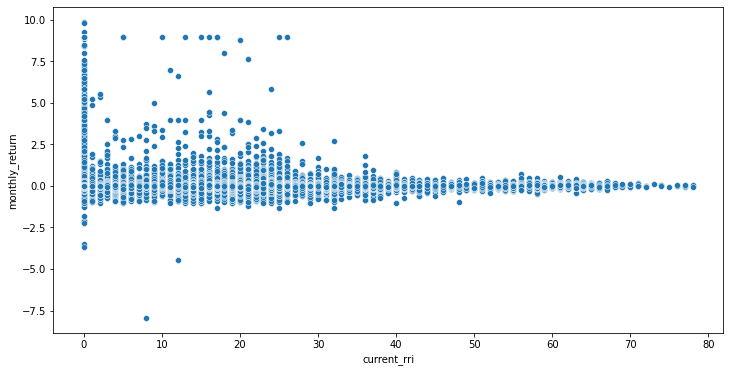

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot('current_rri','monthly_return', data=us_cap_10to20)
ax.set_title('Relationship between current RRI and monthly return', fontsize=16)


In [52]:
country_data = us_cap_10to20.groupby(['year','reprisk_rating'])['country_sector_average'].mean().unstack('reprisk_rating')
country_data

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC
year,,,,,,,,,
2010,21.099790,21.389167,18.584074,35.452128,33.782235,24.348466,43.090909,37.014925,38.770833
2011,21.189129,21.161725,18.556231,36.095000,33.286432,23.849558,40.250000,36.000000,38.620968
2012,20.893285,20.781395,18.757296,37.438395,31.295918,23.713228,NaN,36.488636,35.450549
2013,22.174746,21.937195,19.000000,36.374302,30.931106,24.001949,43.000000,39.161017,36.103774
2014,22.619703,22.312017,19.000000,34.681614,31.536434,24.513983,40.764706,36.133333,34.550388
2015,22.282058,22.212819,19.000000,34.349576,30.025785,25.035517,37.545455,36.148148,31.851590
2016,21.281901,21.419193,18.605356,31.883905,29.310588,24.132344,38.888889,35.729167,30.332090
2017,21.488080,21.145032,18.509181,30.220745,29.726648,24.505842,47.666667,36.333333,31.268182
2018,23.038731,22.129942,18.745098,30.752336,30.257426,26.353230,48.222222,39.538462,32.267717


Text(0.5, 1.0, 'Mean of country-sector average for each ratings')

<Figure size 864x432 with 0 Axes>

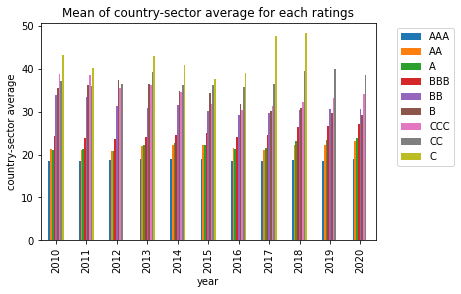

In [53]:
plt.figure(figsize=(12,6))
country_data[['AAA','AA','A','BBB','BB','B','CCC','CC','C']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('country-sector average')
plt.title('Mean of country-sector average for each ratings')

In [54]:
country_data['A_sum'] = (country_data['A']+ country_data['AA']+ country_data['AAA'])/3
country_data['B_sum'] = (country_data['B']+ country_data['BB']+ country_data['BBB'])/3
country_data['C_sum'] = (country_data['C'].fillna(np.mean(meangraph['C']))+ country_data['CC']+ country_data['CCC'])/3
country_data

reprisk_rating,A,AA,AAA,B,BB,BBB,C,CC,CCC,A_sum,B_sum,C_sum
year,,,,,,,,,,,,
2010,21.099790,21.389167,18.584074,35.452128,33.782235,24.348466,43.090909,37.014925,38.770833,20.357677,31.194276,39.625556
2011,21.189129,21.161725,18.556231,36.095000,33.286432,23.849558,40.250000,36.000000,38.620968,20.302362,31.076997,38.290323
2012,20.893285,20.781395,18.757296,37.438395,31.295918,23.713228,NaN,36.488636,35.450549,20.143992,30.815847,23.980474
2013,22.174746,21.937195,19.000000,36.374302,30.931106,24.001949,43.000000,39.161017,36.103774,21.037314,30.435786,39.421597
2014,22.619703,22.312017,19.000000,34.681614,31.536434,24.513983,40.764706,36.133333,34.550388,21.310573,30.244011,37.149476
2015,22.282058,22.212819,19.000000,34.349576,30.025785,25.035517,37.545455,36.148148,31.851590,21.164959,29.803626,35.181731
2016,21.281901,21.419193,18.605356,31.883905,29.310588,24.132344,38.888889,35.729167,30.332090,20.435483,28.442279,34.983382
2017,21.488080,21.145032,18.509181,30.220745,29.726648,24.505842,47.666667,36.333333,31.268182,20.380764,28.151078,38.422727
2018,23.038731,22.129942,18.745098,30.752336,30.257426,26.353230,48.222222,39.538462,32.267717,21.304590,29.120998,40.009467


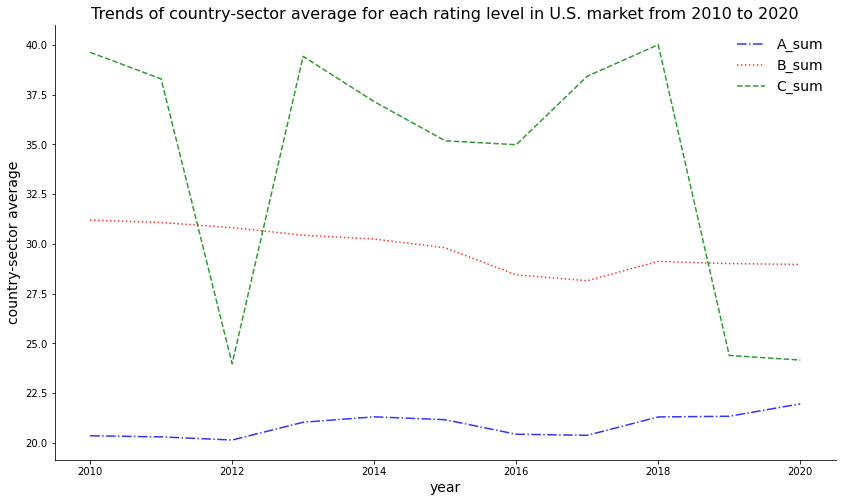

In [55]:
fig, ax = plt.subplots(figsize=(14,8)) 
ax.plot(country_data.index, country_data['A_sum'],
        color='blue', alpha = 0.8, linestyle = '-.', label = 'A_sum')  
ax.plot(country_data.index, country_data['B_sum'],
        color='red', alpha = 0.8, linestyle = ':', label = 'B_sum')
ax.plot(country_data.index, country_data['C_sum'],
        color='green', alpha = 0.8, linestyle = '--', label = 'C_sum')

ax.set_xlabel('year', fontsize = 14) 
ax.set_ylabel('country-sector average', fontsize = 14)  

ax.set_title('Trends of country-sector average for each rating level in U.S. market from 2010 to 2020', fontsize = 16)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False, fontsize=14)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US Country.png') 

plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


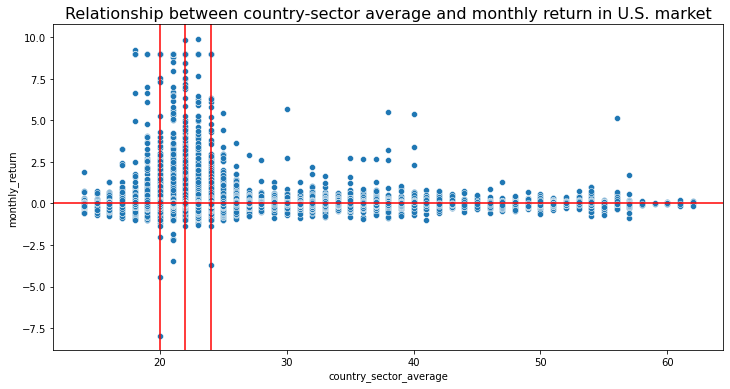

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot('country_sector_average','monthly_return', data=us_cap_10to20)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = us_cap_10to20['country_sector_average'].quantile(.2), color = 'r', linestyle = '-')
plt.axvline(x = us_cap_10to20['country_sector_average'].quantile(.5), color = 'r', linestyle = '-')
plt.axvline(x = us_cap_10to20['country_sector_average'].quantile(.8), color = 'r', linestyle = '-')
plt.title('Relationship between country-sector average and monthly return in U.S. market', fontsize=16)
plt.savefig('/Users/wuliyang/Desktop/Spring2/Capstone/Project/US relationship country & monthly return.png') 


In [57]:
us_cap_10to20['country_sector_average'].quantile(.2)

20.0

In [58]:
us_cap_10to20['country_sector_average'].quantile(.5)

22.0

In [59]:
us_cap_10to20['country_sector_average'].quantile(.8)

24.0